Import

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Importing files

(-16.8623, 37.528299999999994, -25.293999999999997, 29.42)

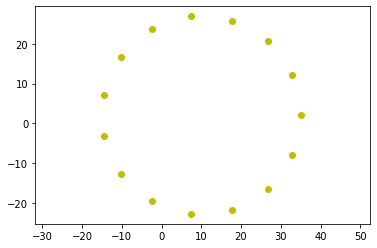

In [3]:
l = np.loadtxt('xy_circle.txt')  # Import
points_t = np.loadtxt('xy_transformed.txt')
# print(points_raw)
# print(points_t)
x0 = np.hstack((np.mean(l, axis=0), np.array([(np.max(l[:,0])-np.min(l[:,0]))*0.5])))
plt.plot(l[:,0],l[:,1],'yo')
plt.axis('equal')


Circle function:
$\left( \text{x}-\text{x}_0 \right) ^2+\left( \text{y}-\text{y}_0 \right) ^2=\text{R}^2$

Function derivative by variables:
$$\frac{\partial \text{f}}{\partial \text{x}}=-2\left( \text{x}-\text{x}_0 \right) ,-2\left( \text{y}-\text{y}_0 \right) ,-2\text{R}_0$$

Function derivative by measurements:
$$\frac{\partial \text{f}}{\partial \text{l}}=2\left( \text{x}-\text{x}_0 \right) ,2\left( \text{y}-\text{y}_0 \right) $$

Initial Matrices

In [4]:
def a(l0, x0, varnum):  # Calculating Matrix A for Least Square
    result = np.zeros((l0.shape[0], varnum))
    for i in range(l0.shape[0]):
        for j in range(varnum):
            if j == 0:
                result[i, j] = -2 * (l0[i, j] - x0[j])
            elif j == 1:
                result[i, j] = -2 * (l0[i, j] - x0[j])

            elif j == 2:
                result[i, j] = -2 * (x0[j])
    return result


def b(l0, x0):  # Calculating Matrix b for Least Square
    result = np.zeros((l0.shape[0], l0.shape[0] * 2))
    for i in range(0, l0.shape[0]):
        result[i, i * 2] = 2 * (l0[i, 0] - x0[0])
        result[i, i * 2 + 1] = 2 * (l0[i, 1] - x0[1])
    return result


def w(l0, x0):  # Calculating Matrix W for Least Square
    result = np.zeros((l0.shape[0], 1))
    for i in range(l0.shape[0]):
        result[i, 0] = (l0[i, 0] - x0[0]) ** 2 + (l0[i, 1] - x0[1]) ** 2 - x0[2] ** 2
    return result

Advanced Matrices

In [5]:

def m(lstqB):
    return np.dot(lstqB, lstqB.T)

def n(lstqA,lstqM):
    return np.dot(np.dot(lstqA.T, np.linalg.inv(lstqM)), lstqA)

def u(lstqA, lstqM, lstqW):
    return np.dot(np.dot(lstqA.T, np.linalg.inv(lstqM)), lstqW)

def delta(lstqN, lstqu):
    return np.dot(np.linalg.inv(lstqN), lstqu)

Creating initial Matrices & Iterative solution

In [6]:
deltax = np.array([1,1,1]).T
lstqW = np.ones((l.shape[0], 1))
while np.linalg.norm(deltax) > 0.0001:
    #print(x0)
    # print(np.linalg.norm(deltax))
    # print(np.linalg.norm(lstqW))
    # print(deltax)
    # print(x0)
    # print(lstqW,'\n')
    lstqA = a(l, x0, 3)
    lstqB = b(l, x0)
    lstqW = w(l, x0)
    lstqM = m(lstqB)
    lstqN = n(lstqA, lstqM)
    lstqu = u(lstqA, lstqM, lstqW)
    deltax = -delta(lstqN, lstqu)
    x0 = x0 + deltax[:,0]

Final Result

Vector x (x0,y0,R): [10.05   2.052 24.985]
Sig postriory [[0.02696572]]


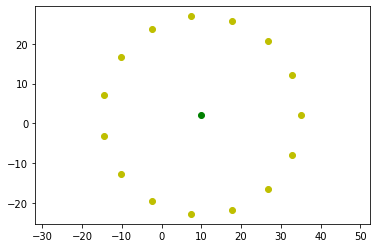

In [7]:
print('Vector x (x0,y0,R):', np.round(x0,3))
plt.plot(l[:,0],l[:,1],'yo')
plt.plot(x0[0],x0[1],'go')
plt.axis('equal')
lstqV = np.dot(np.dot(lstqB.T,np.linalg.inv(lstqM)),np.dot(lstqA,deltax)+lstqW)
sigpost = (1/(l.shape[0]-3))*np.dot(lstqV.T,lstqV)
#print('max(abs(W):', np.max(np.sqrt(np.absolute(lstqW))))
print('Sig postriory', np.sqrt(sigpost))
